# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [1]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

На занятии мы уже <a href="https://miptstats.github.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [3]:
# Read data from csv file
df = pd.read_csv('../Data/titanic/train.csv')

# Check the data
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [4]:
# msk = np.random.rand(len(df)) < 0.7
# train_df = df[msk]
# test_df = df[~msk]

# Divide data into test and train via sample to avoid unrandom random
train_df = df.sample(frac=0.7)
test_df = df.drop(train_df.index)

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [5]:
# Define important features
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'] # Feature columns
target_column = 'Survived'  # Target feature

# Function to extract important features
def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [6]:
# Apply to test and train data
train_features, train_label = get_features_and_target(train_df)
test_features, test_label = get_features_and_target(test_df)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

PairPlot хорошо подходит для визуального поиска зависимостей в данных, так как предоставляет различные попарные графики, многие из которых не найдут своего применения в дальнейшей работе. Но какие-то из них помогут найти нужную зависимость. После постарения графиков я буде акцентировать внимание на некоторых из них, на мой взгляд самых важных.

Построим pairplot для попарных признаков. Для улучшения читабельности построены 4 графика (для попарных половин признаков).

In [7]:
# pairplot function create pairplot with specific parameters
def pairplot(data, title=''):
    data_col_mid = len(list(data.columns)) // 2
    cols = [list(data.columns[:data_col_mid]), list(data.columns[data_col_mid:])]
    for i, j in [(0, 0), (0, 1), (1, 0), (0, 0)]:
        sns.pairplot(data, hue='Survived', kind='hist', dropna=True,
                     height=5, aspect=0.7, x_vars=cols[i], y_vars=cols[j])
    plt.title(title)

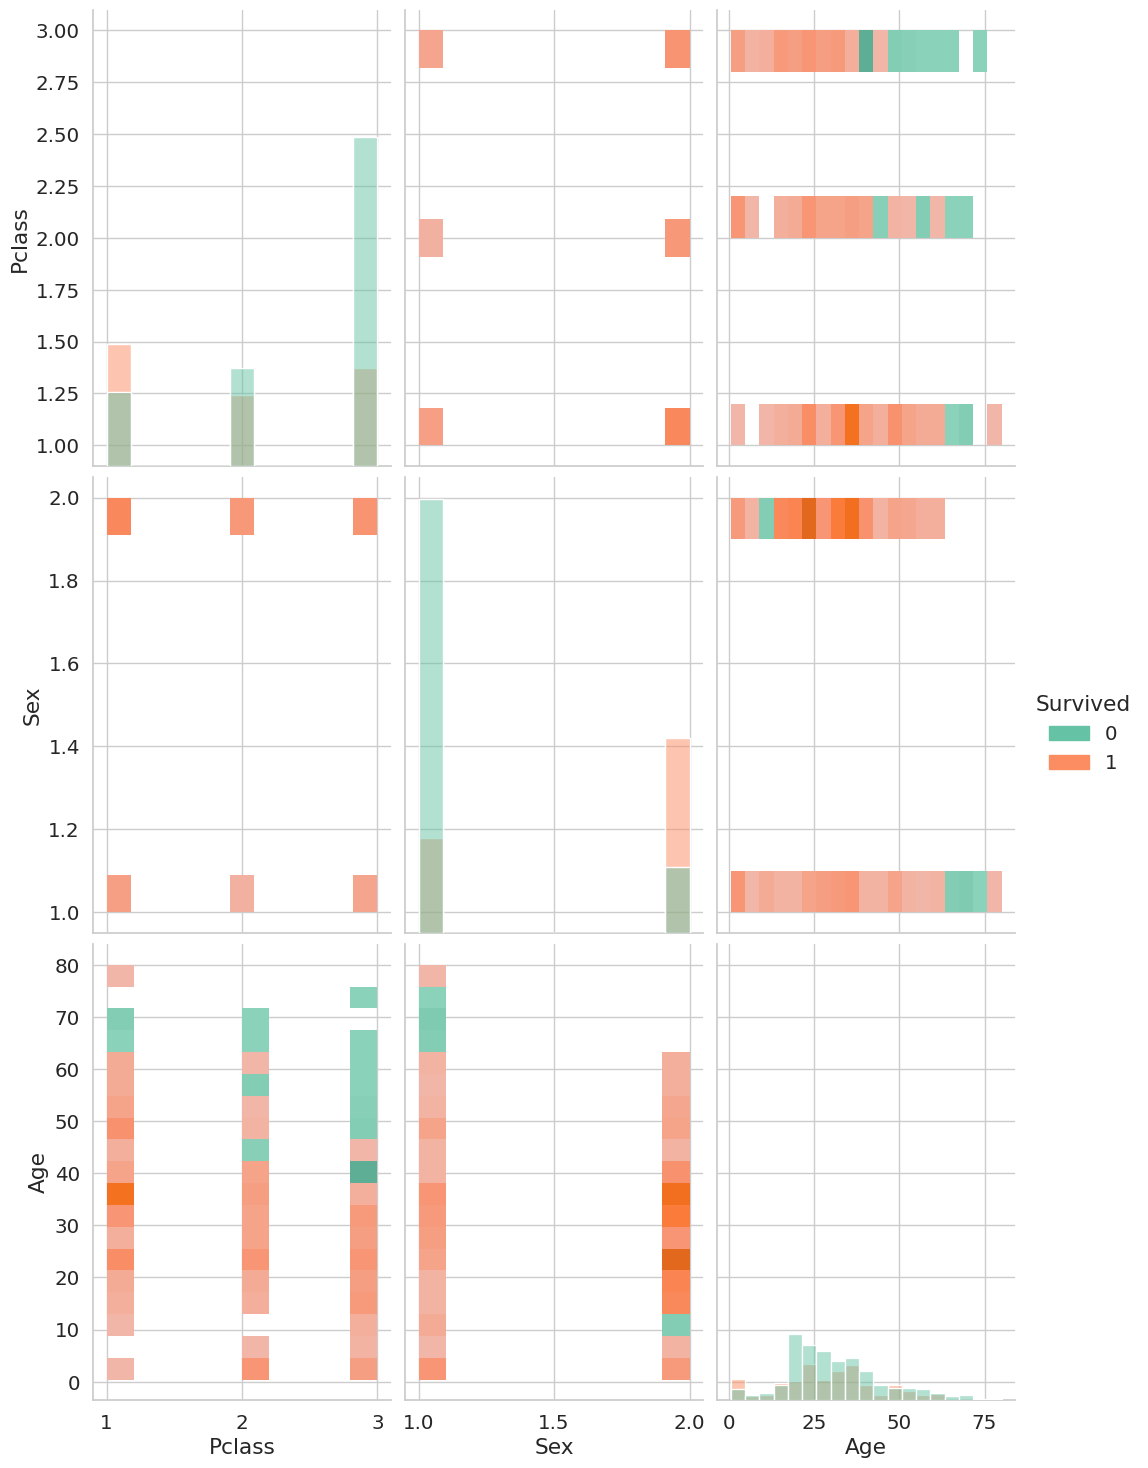

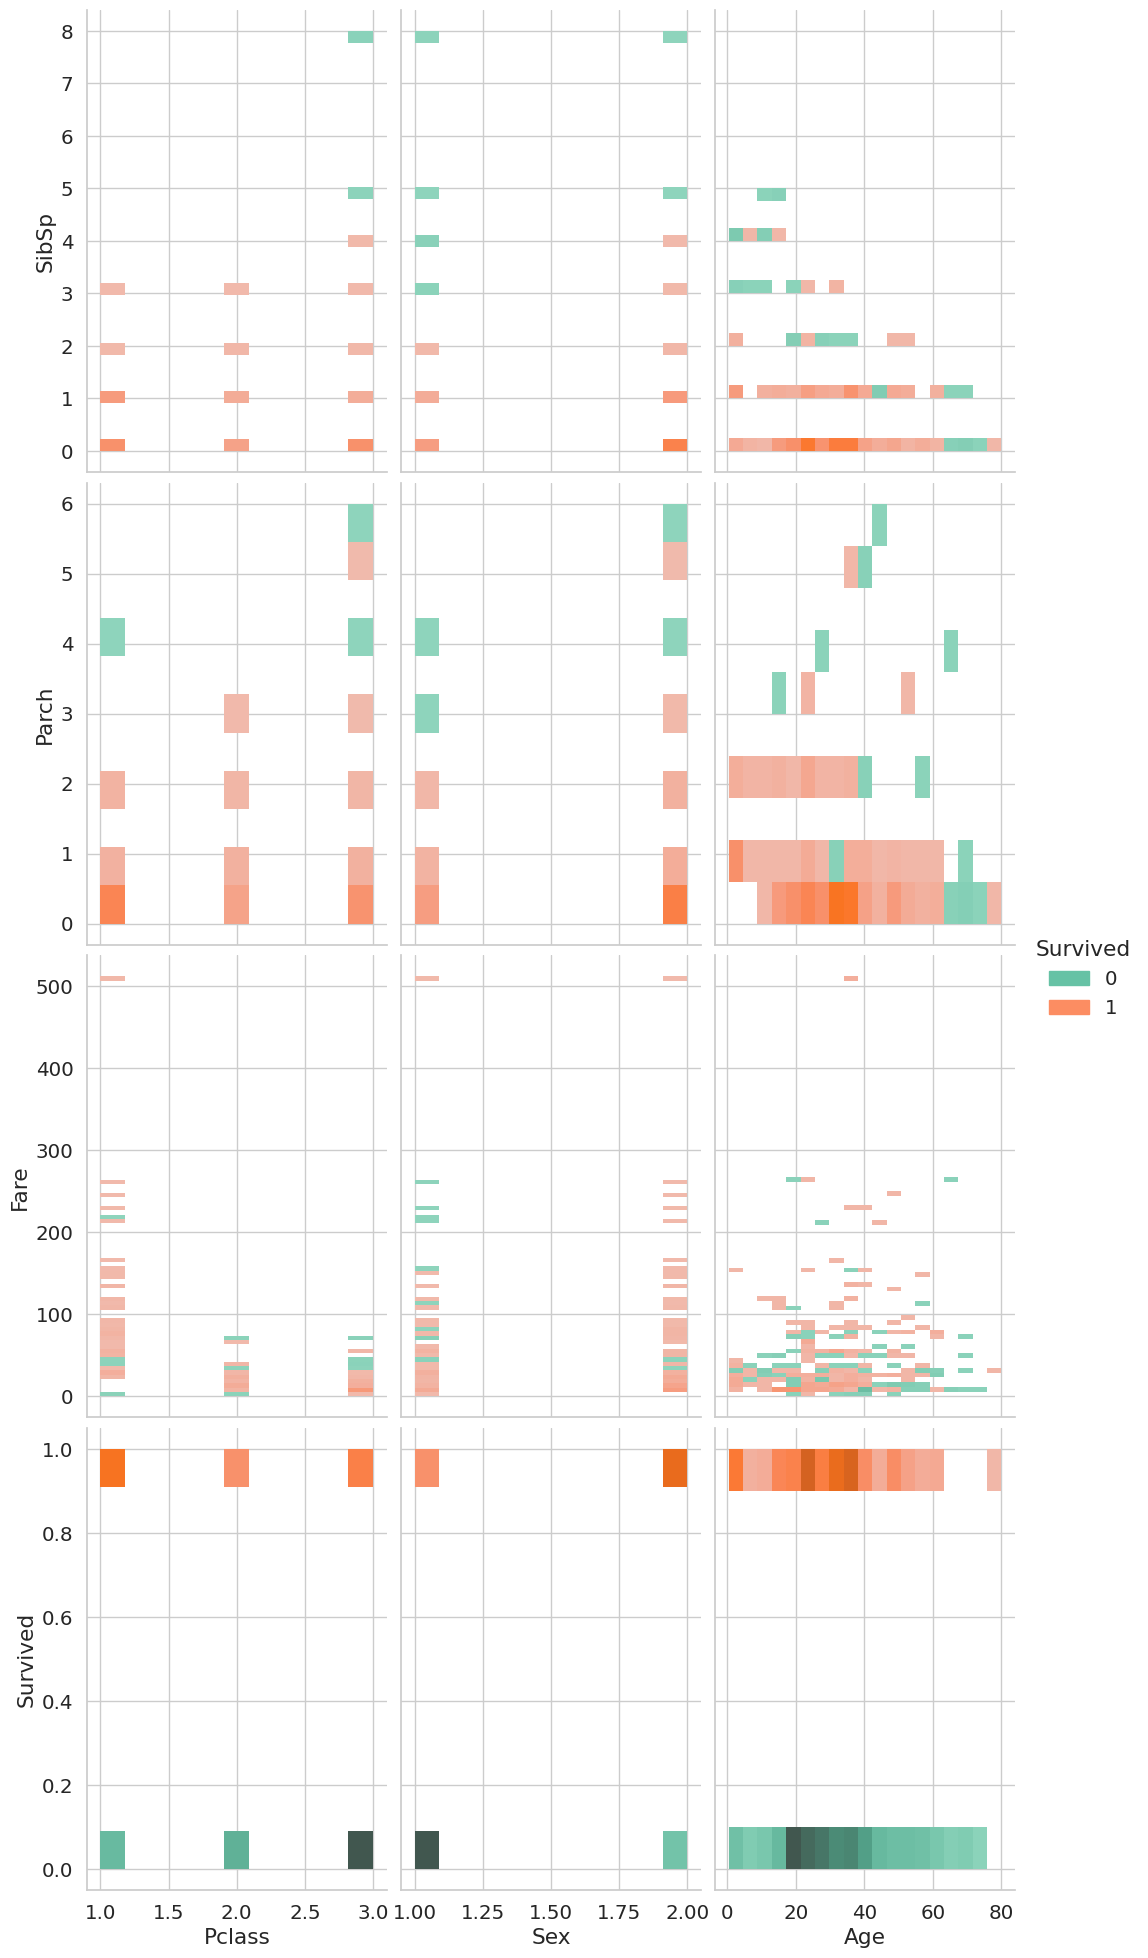

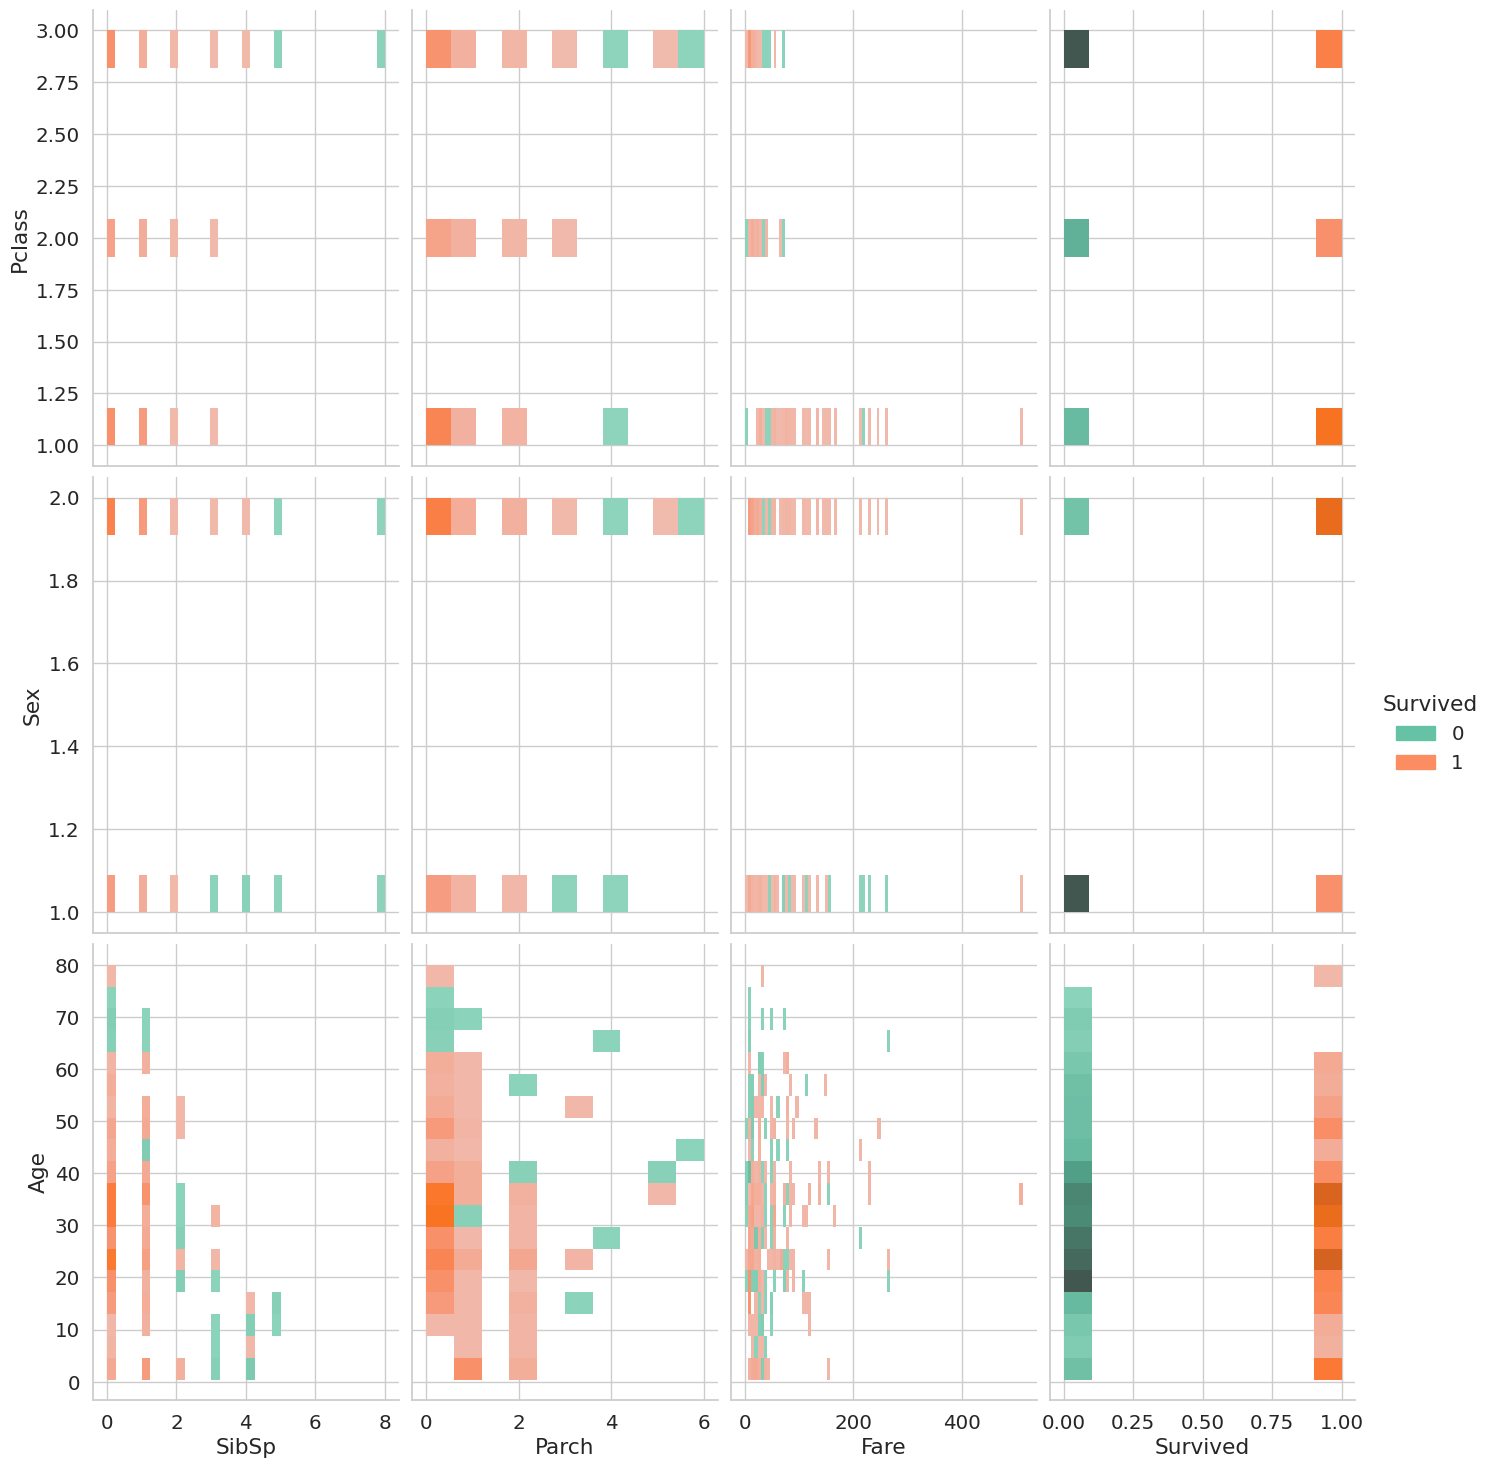

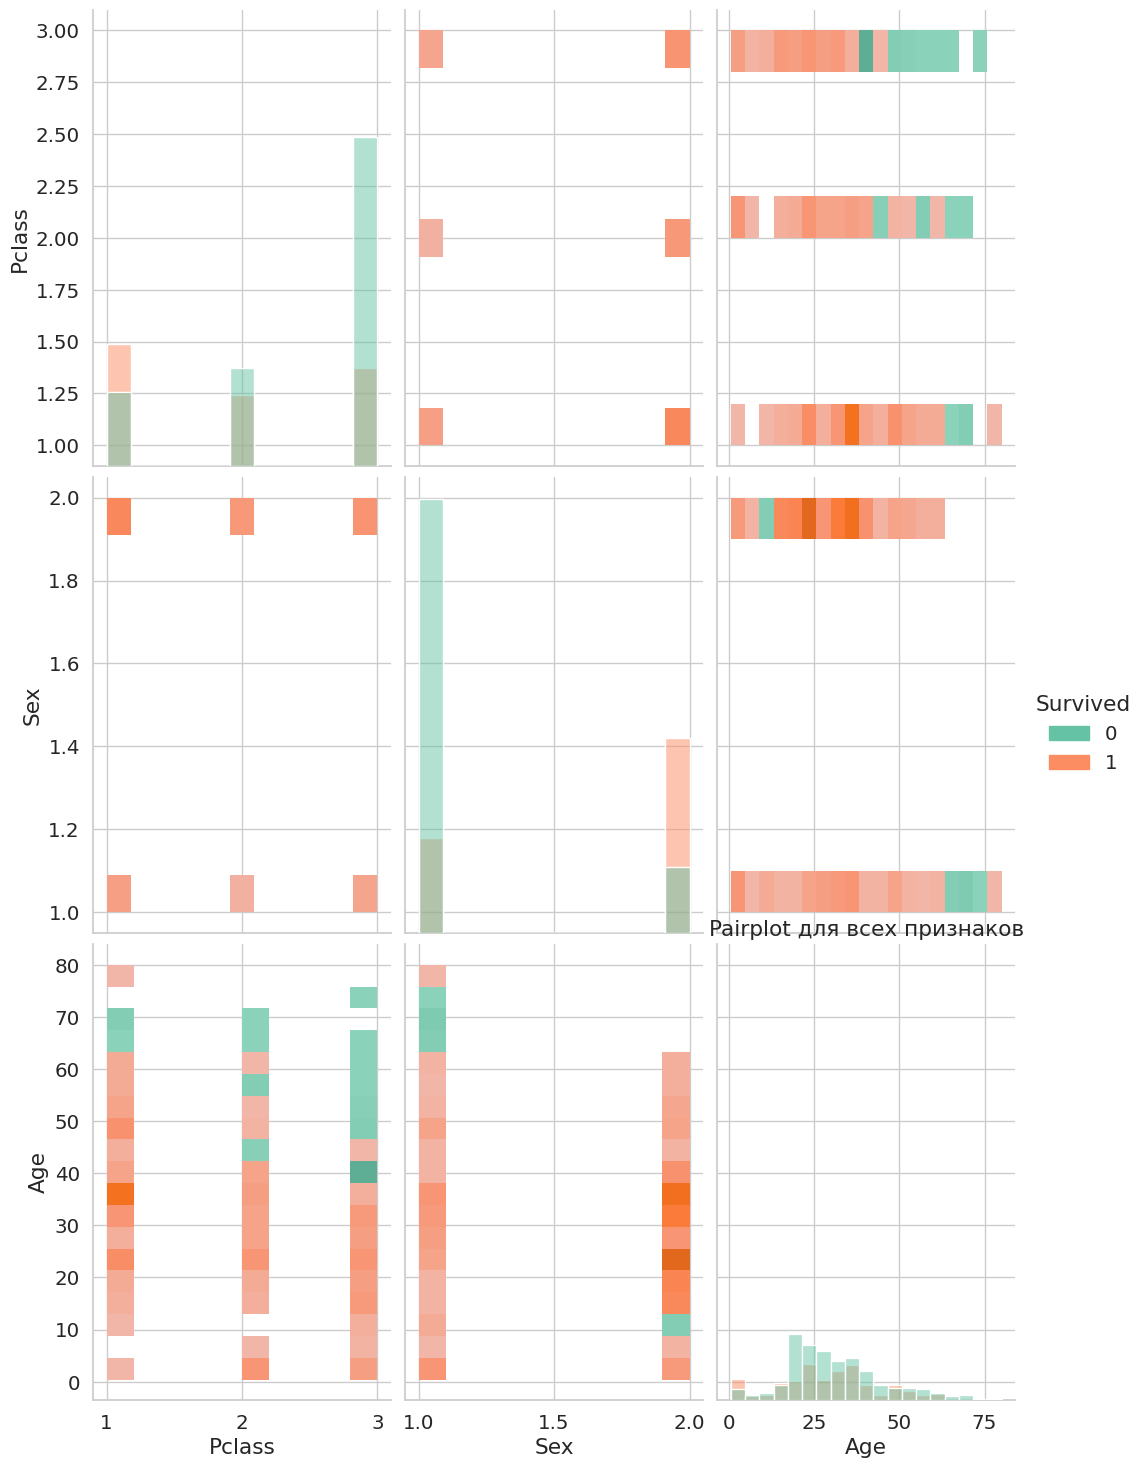

In [8]:
# Create joined_data DF to easily interact with data
joined_data = train_features.join(train_label)

# Label encoding 'Sex' catigoral variable
joined_data['Sex'] = joined_data['Sex'].replace(['male', 'female'],[1, 2])


# Pairplot for all the data
pairplot(joined_data, 'Pairplot для всех признаков');

Из гистограммы для пола видно, что женщины выживают чаще мужчин.

Также можно заметить что 3 класс умирает чаще остальных.

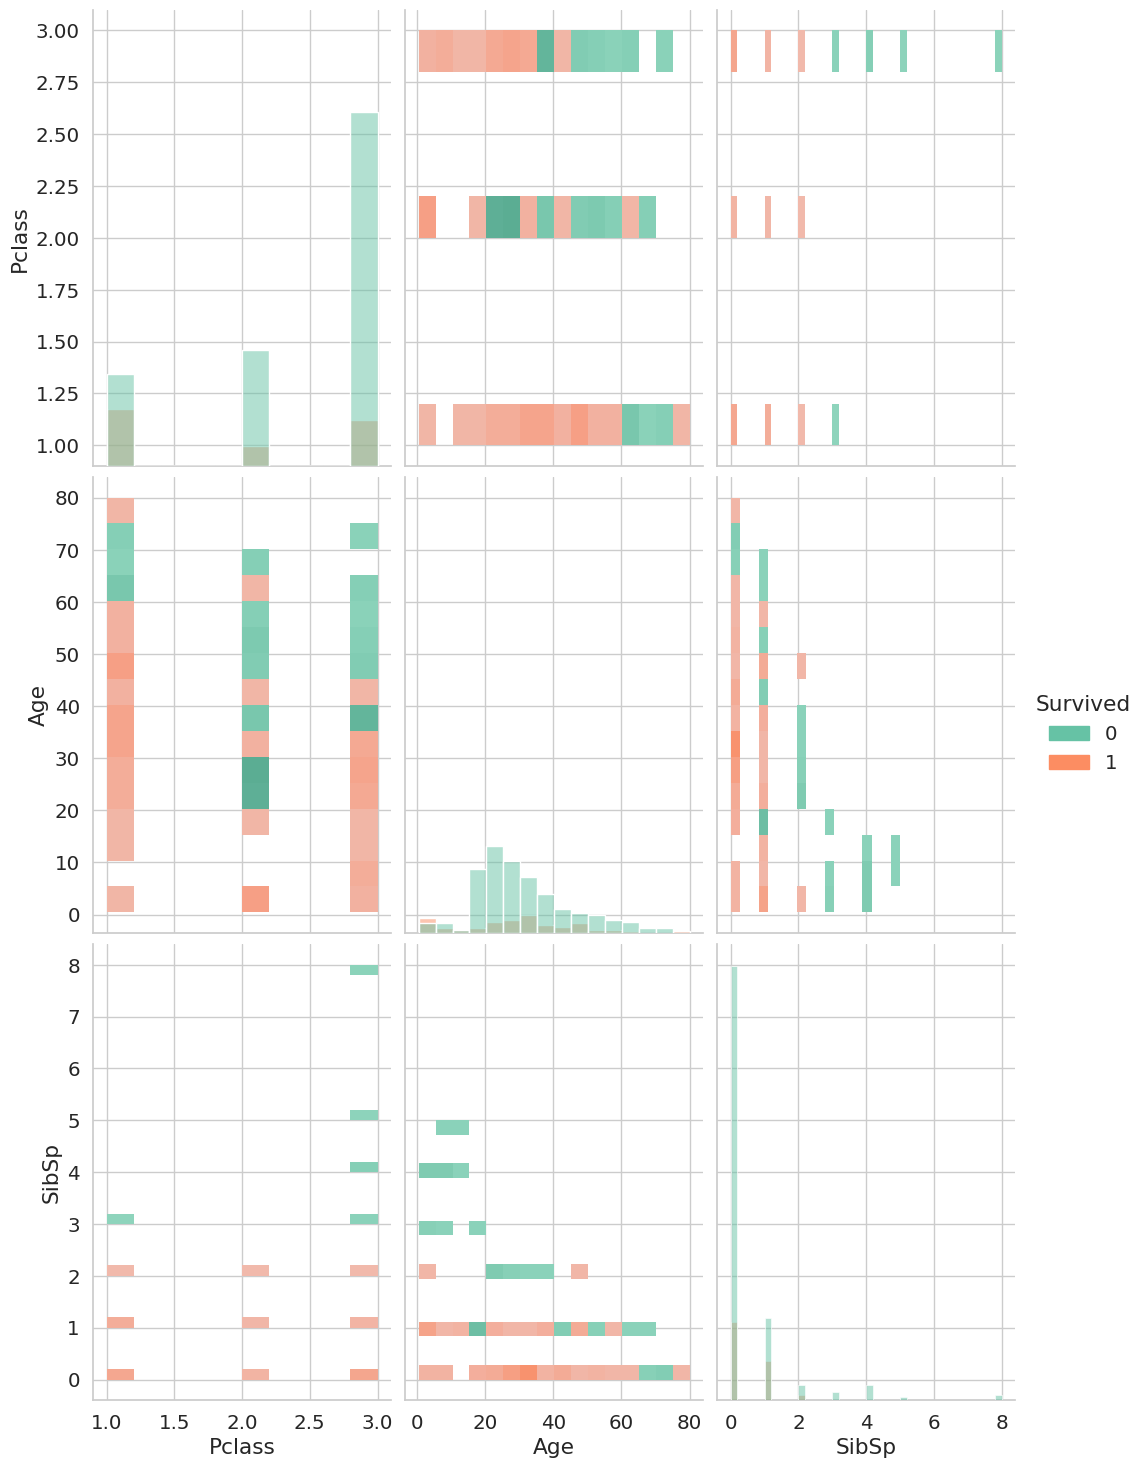

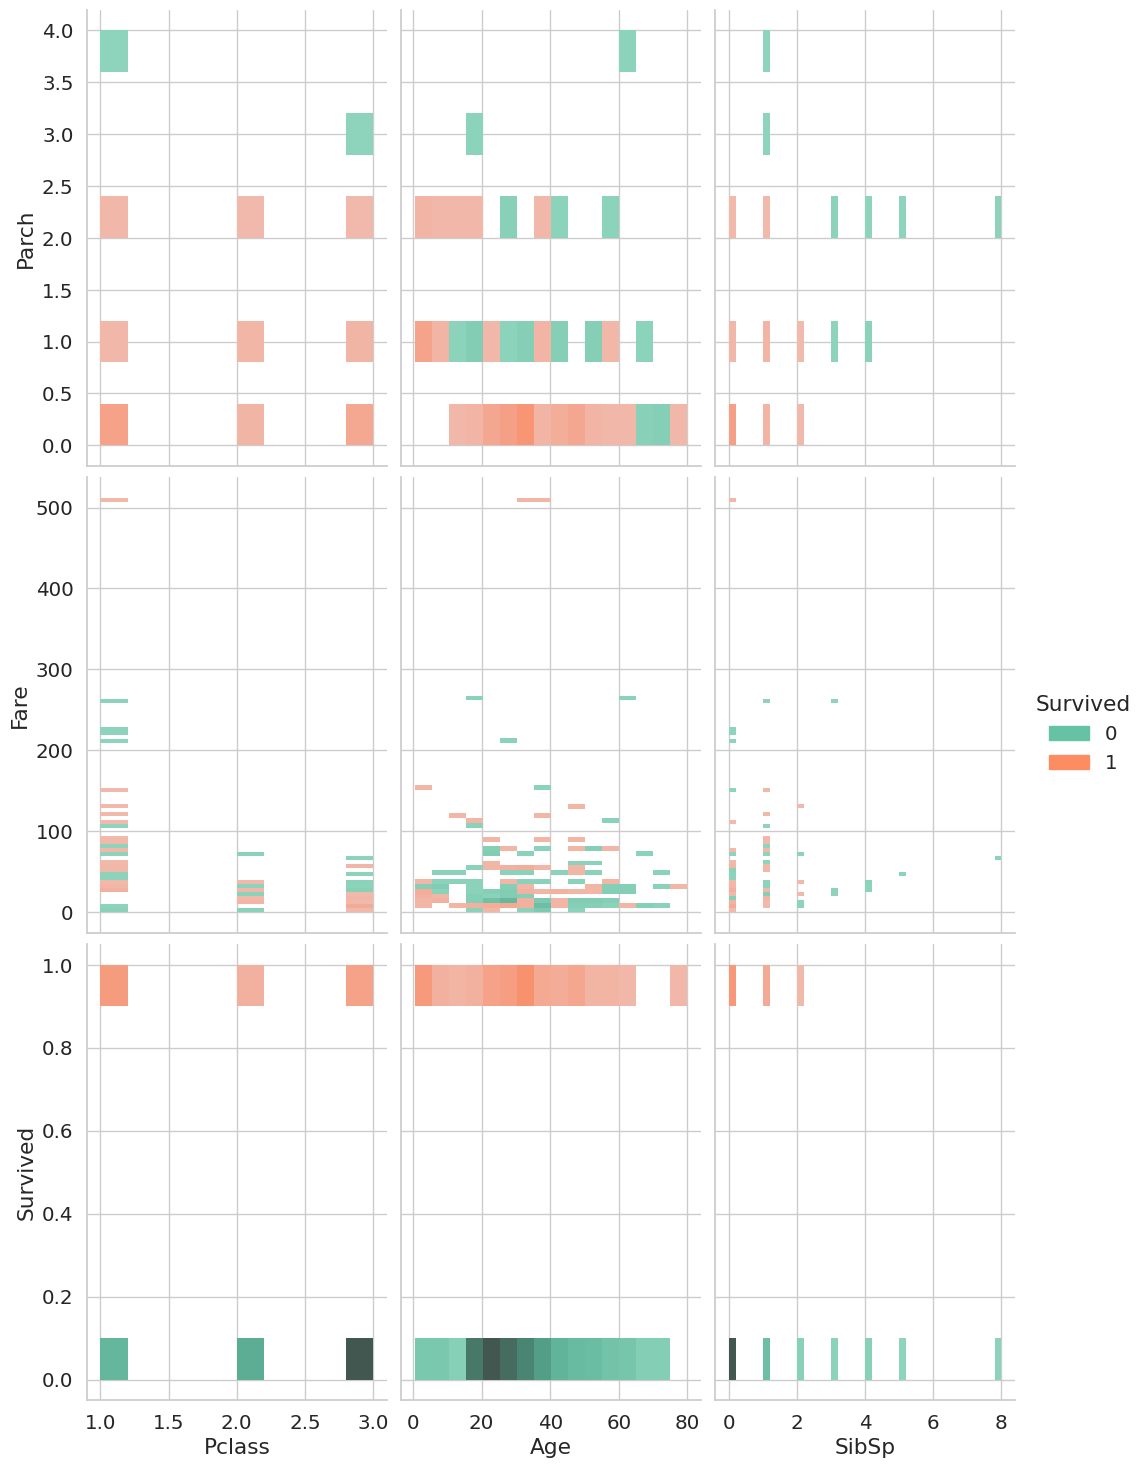

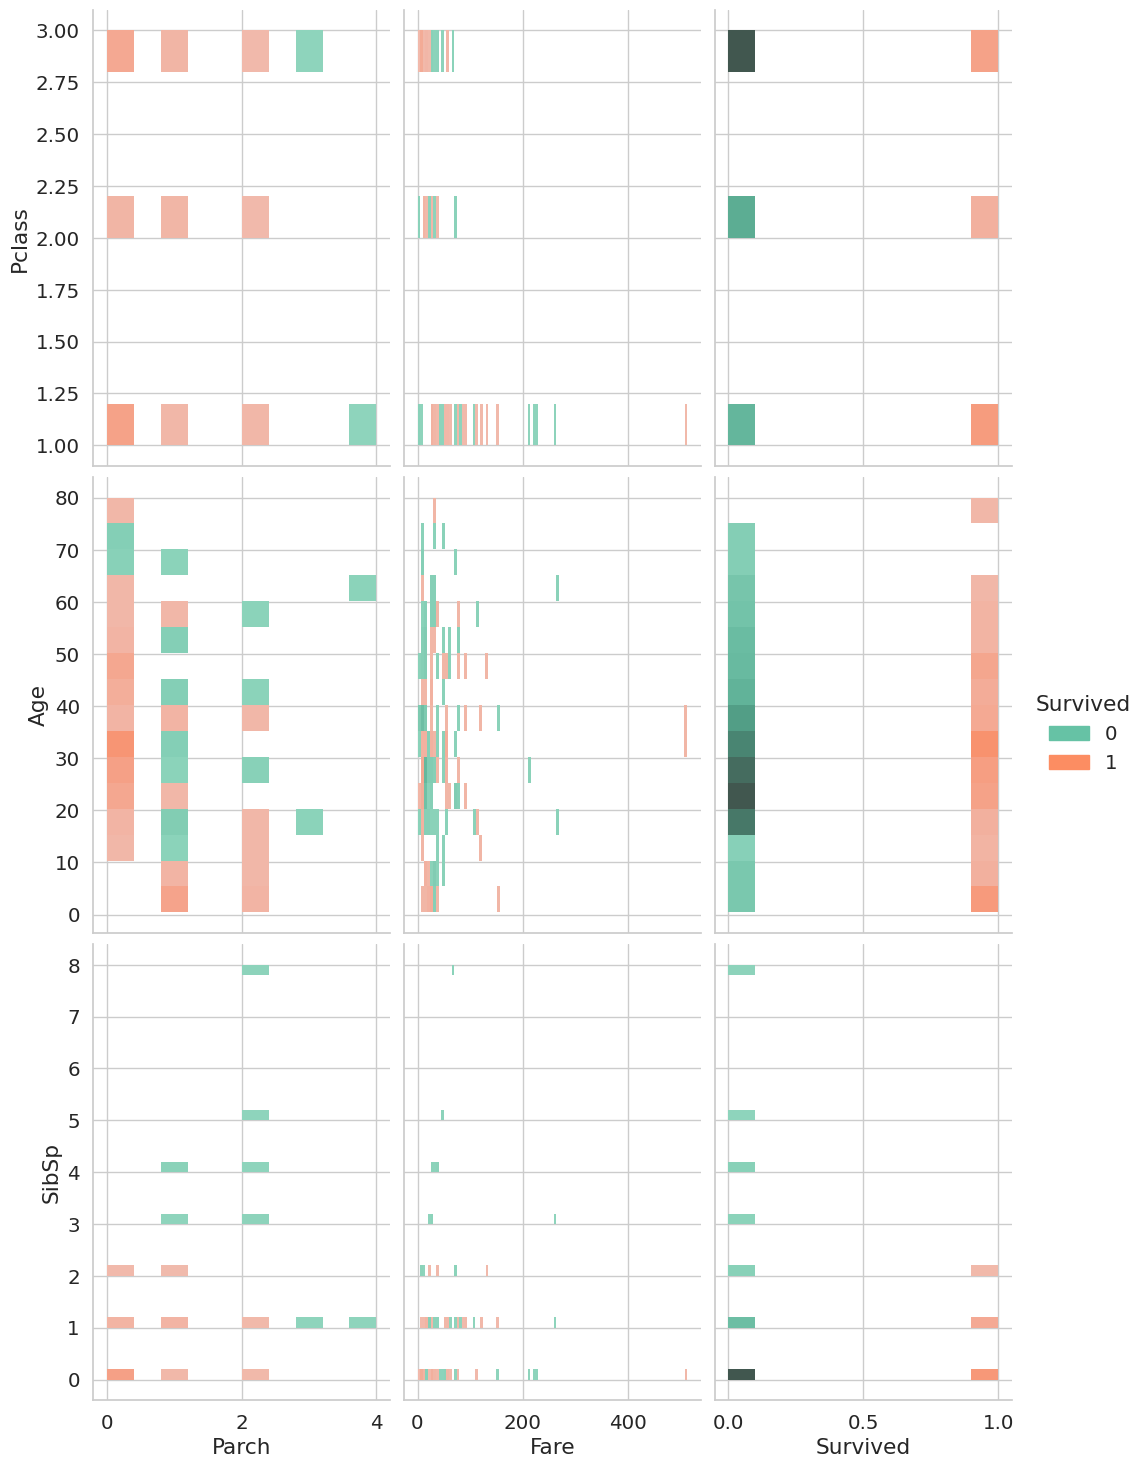

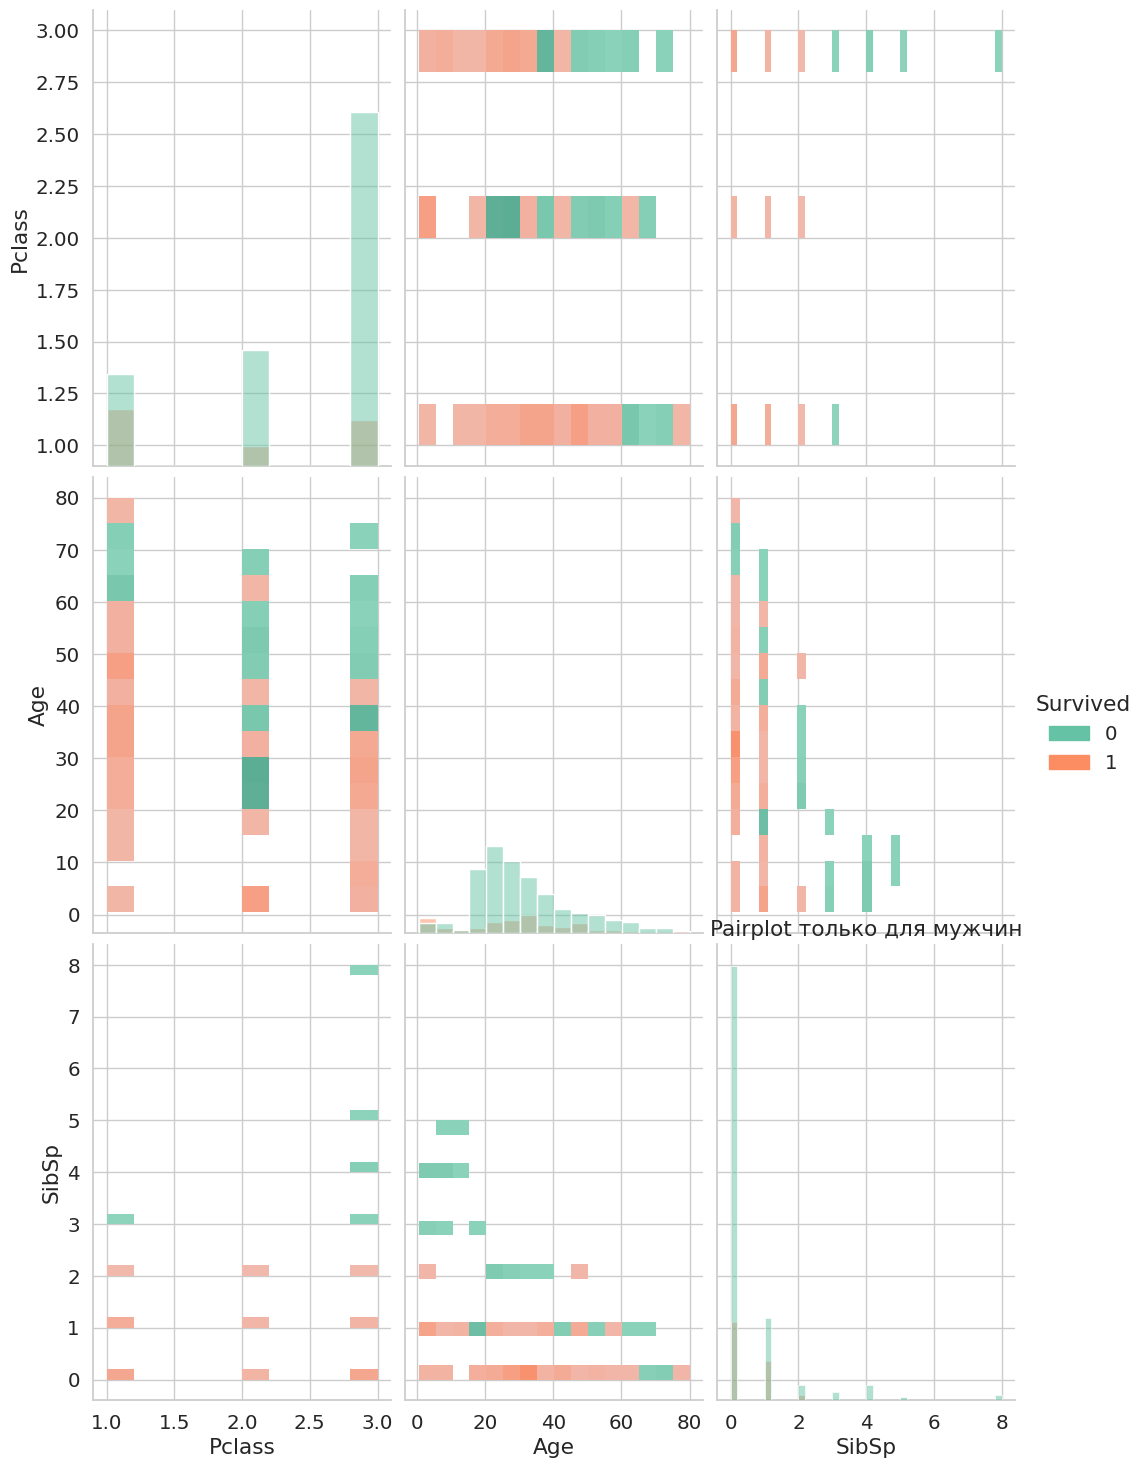

In [9]:
pairplot(joined_data[joined_data['Sex'] == 1].drop(columns=['Sex']), 'Pairplot только для мужчин');

Из гистограммы для возраста пассажиров можно сказать, что большинство пассажиров старше примерно лет 10 - выжили.

In [10]:
# # Pairplot for different classes
# pairplot(joined_data[joined_data['Pclass'] == 1], 'Pairplot for the 1st class')
# pairplot(joined_data[joined_data['Pclass'] == 2], 'Pairplot for the 2nd class')
# pairplot(joined_data[joined_data['Pclass'] == 3], 'Pairplot for the 3rd class')

лохое оформление ноутбука. Комм. МОЖНО ИСПРАВИТЬ
Много кода в одной ячейке или же вермишель ячеек. См. презентацию с за#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**
* Корень: Какой пол (Sex)?
* Если Женский (Female), то результат --- выживший (Survived).
* Если Мужской (Male), то ветвление: Возраст (Age) > 20 (лет)?
* * Если Да (True) (Возраст (Age) > 20), то результат --- мертвый (Dead).
* * Если Нет (False) (Возраст (Age) < 20), то результат --- выживший (Survived).


![](../Pictures/Tree-1.png )

**Дерево 2:**

* Корень: Класс (Pclass) >= 3?
* Если Нет (False) (Класс (Pclass) < 3), то результат --- выживший (Survived).
* Если  Да (True) (Класс (Pclass) >= 3), то результат --- мертвый (Dead).


![](../Pictures/Tree-2.png )


Реализуйте полученные деревья по шаблону

In [11]:
def tree1(features):
    predict = ((features['Sex'] == 2) | (features['Age'] < 8)).astype(int)
    return predict


def tree2(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    predict = (features['Pclass'] != 3).astype(int)
    return predict

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Точность - количество правильных предположений, деленное на число всех элементов тестовой выборки.

Реализуйте данный критерий по шаблону

In [12]:
def criteria(target, predicted):
    '''
    Вычисление критерия качества для предсказания predicted, 
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''
    return np.sum(target == predicted).astype(float) / predicted.size

Посчитайте качество полученных ранее деревьев.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [13]:
print('Оценка качества первого дерева на тренировочно:', criteria(train_label, tree1(train_features)))
print('Оценка качества второго дерева на тренировочно:', criteria(train_label, tree2(train_features)))
print('---------------------')
print('Оценка качества первого дерева на тестовой:', criteria(test_label, tree1(test_features)))
print('Оценка качества второго дерева  на тестовой:', criteria(test_label, tree2(test_features)))

Оценка качества первого дерева на тренировочно: 0.6474358974358975
Оценка качества второго дерева на тренировочно: 0.6602564102564102
---------------------
Оценка качества первого дерева на тестовой: 0.6104868913857678
Оценка качества второго дерева  на тестовой: 0.6853932584269663


Из этих оценок видно, что простое дерево, которое оценивает выживаемость пассажира по классу - работает точнее, чем более сложное.
Но исходя из того, что и на тестовой выборке и на тренировочной точности отличаются не сильно, можно предположить устойчивость данных деревьев к различным данным.

**5. Метод ближайшего соседа**

В домашнем задании 1 вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

Функция для поиска ближайших соседей среди множества точек.

In [14]:
def find_nearest_points(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:
    newA = np.repeat(A[:, np.newaxis, :], B.shape[0], axis=1)
    newB = np.repeat(B[np.newaxis, :, :], A.shape[0], axis=0)
    dist_matrix = np.sum((newA - newB) ** 2, axis=2)
    return (np.argsort(dist_matrix, axis=0) + 1)[:k, :].T

Реализация алгоритма knn.

In [15]:
def knn(features, train_features, train_target, k=1):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''

    # Get np.ndarrays for our function

    features_matrix = features.to_numpy()
    train_matrix = train_features.to_numpy()

    # Find the nearest points
    indexes = find_nearest_points(train_matrix, features_matrix, k)

    # Function to calculate values by indexes of the nearest points
    def get_knn_value(feature, trained, targets, idxs, k):
        # Create zeros array
        values = np.zeros(feature.shape[0])

        # Iter in features
        for index, pair in zip(range(feature.size), feature):

            # Summing up targets on trained data only with nearest points
            sum_targets = 0
            for near_idx in idxs[index]:
                sum_targets += targets[near_idx - 1]

            # Round it to find mean
            values[index] = round(sum_targets / k)
        return values

    predict = get_knn_value(features_matrix, train_matrix, train_target.to_numpy(), indexes, k)
    return predict

Применяем knn и строим график точности.

Максимальная точность knn:0.6779026217228464 достигается при количестве соседей:19


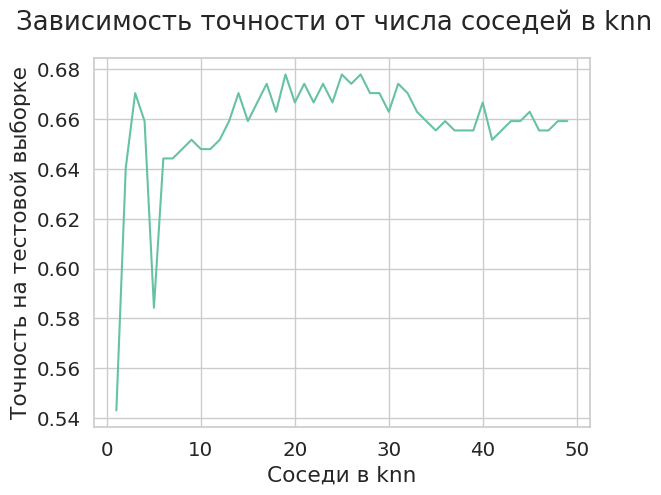

In [16]:
# To avoid warnings
import warnings
with warnings.catch_warnings(record=True):
    # Make Sex numerical feture
    test_features['Sex'] = test_features['Sex'].replace(['male', 'female'],[1, 2])
    train_features['Sex'] = train_features['Sex'].replace(['male', 'female'],[1, 2])

# Create arrays for plotting
X = [i for i in range(1, 50)]
Y = [criteria(test_label, knn(test_features, train_features, train_label, k=x)) for x in X]

plt.plot(X, Y)
plt.suptitle("Зависимость точности от числа соседей в knn")
plt.xlabel('Соседи в knn')
plt.ylabel('Точность на тестовой выборке')

print('Максимальная точность knn:{} достигается при количестве соседей:{}'.format(np.max(Y), np.argmax(Y) + 1))

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

#### 6. Выводы

Исходя из того, что точность определения выживания слабо меняется от количества соседей в knn при малых значениях, можно сделать вывод, что несмотря на то, что есть некоторые правила определения выживания, для них всегда есть исключения, которые происходят с достаточно большой частотой. Причем наибольшая точность достигается при 26 соседях.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

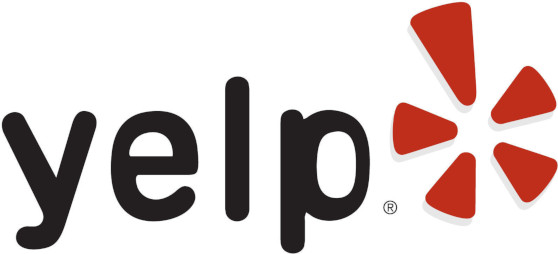

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [17]:
# Read data from csv file
df = pd.read_csv('../Data/task3_data/yelp_business.csv')

# Check the data
df.head()

Unnamed: 0             business_id                        name  \
0           0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"   
1           1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"   
2           2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"   
3           3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"   
4           4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"   

  neighborhood                           address            city state  \
0          NaN        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ   
1          NaN              "3101 Washington Rd"        McMurray    PA   
2          NaN          "6025 N 27th Ave, Ste 1"         Phoenix    AZ   
3          NaN  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ   
4          NaN                    "581 Howe Ave"  Cuyahoga Falls    OH   

  postal_code   latitude   longitude  is_open  \
0       85044  33.330690 -111.978599        1   
1       15317  40.291685  -80.104900        1   
2       85017  33.524903 -112.115310        1   
3       85282  33.383147 -111.964725        0   
4       44221  41.119535  -81.475690        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

Сгруппируем данные по id бизнеса.

In [18]:
# DF to be able to restore name by id
df_name_id = df.groupby('business_id').agg(name=('name', 'first'))

Найдем ответ, сгруппировав данные по городу.

In [19]:
# Groupby and agg (count) to count businesses in cities then sort
top_pop_cities = df.groupby('city').agg(num_of_business=('business_id', 'count')).sort_values(by='num_of_business', ascending=[False])
top_pop_cities.head(5)

num_of_business
city                       
Las Vegas             26775
Phoenix               17213
Toronto               17206
Charlotte              8553
Scottsdale             8228

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

Text(0, 0.5, 'Широта')

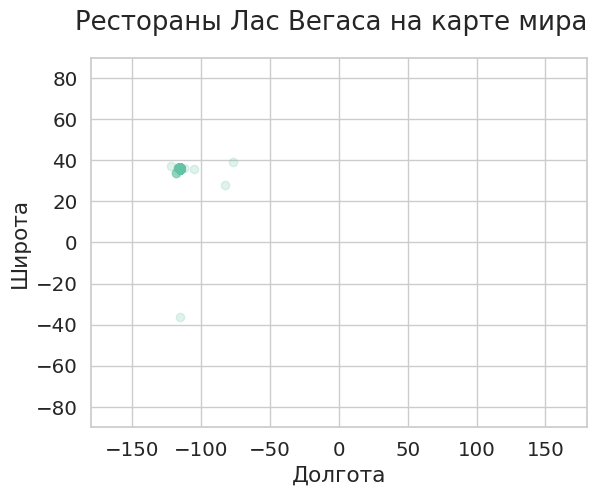

In [20]:
# Define top city
top_city = top_pop_cities.index[0]

# Set values and plot
top_city_businesses = df[df['city'] == top_city]
Y = top_city_businesses['latitude'].values
X = top_city_businesses['longitude'].values

plt.scatter(X, Y, alpha=0.2)
plt.suptitle("Рестораны Лас Вегаса на карте мира")
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.xlabel('Долгота')
plt.ylabel('Широта')

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы.

Удаляем выбросы.

In [21]:
# Set limits for Las Vegas borders
top_city_businesses = top_city_businesses[(36.13 < top_city_businesses['latitude']) & (top_city_businesses['latitude'] < 36.34)
                                        & (-115.365 < top_city_businesses['longitude']) & (top_city_businesses['longitude'] < -115.08)]

Строим график.

Text(0, 0.5, 'Широта')

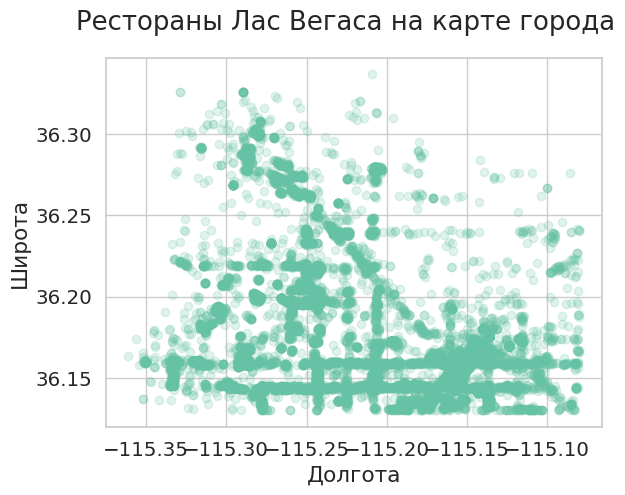

In [22]:
# Plot map with borders
Y = top_city_businesses['latitude'].values
X = top_city_businesses['longitude'].values

plt.scatter(X, Y, alpha=0.2)
plt.suptitle("Рестораны Лас Вегаса на карте города")
plt.xlabel('Долгота')
plt.ylabel('Широта')

Несмотря на то, что я постарался вырезать квадратную границу, более сложные операции требуются для нормального определения принадлежности к Лас Вегасу.
![](../Pictures/Screenshot_of_map.jpg)

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб. Рекомендуется сохранить карту в html и отправить ее отдельным файлом в бот.

Построим интерактивную карту.

In [23]:
# Plot interactive map
import plotly.express as px
fig = px.scatter_geo(top_city_businesses,
                     lat=top_city_businesses['latitude'],
                     lon=top_city_businesses['longitude'],
                     hover_name="name")
fig.write_html("../Pictures/Map.html")
fig.show()

Если все получилось, вы молодцы! Далее в этой задаче тоже можно делать интерактивные карты.

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [24]:
# Read data from csv file
df_review = pd.read_csv('../Data/task3_data/yelp_review.csv')

# Check the data
df_review.head()

Unnamed: 0             business_id  stars
0           0  AEx2SYEUJmTxVVB18LlCwA      5
1           1  VR6GpWIda3SfvPC-lg9H3w      5
2           2  CKC0-MOWMqoeWf6s-szl8g      5
3           3  ACFtxLv8pGrrxMm6EgjreA      4
4           4  s2I_Ni76bjJNK9yG60iD-Q      4

В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [25]:
# Set Index
business_review = df_review.set_index(['business_id'])

# Get only top city
business_review_in_top_city = business_review.loc[df[df['city'] == top_city]['business_id']]

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [26]:
# Groupby and agg
business_review = business_review_in_top_city.groupby('business_id').agg(avarage_review=('stars', 'mean'),
                                                       review_count=('stars', 'count')).sort_values(by=['avarage_review', 'review_count'], ascending=[False, False])

business_review.head()

avarage_review  review_count
business_id                                         
rry0ESbBfS9s-acxsUVq_g             5.0           130
uPJxxt2Qn8uGT2NJvzcGYg             5.0           129
lUM741nAWb4WL-pGiqo7Bw             5.0           111
ab3-BhBFlkfvlUwg8w0-1g             5.0           105
shJPvAZ1pdUVm9DORQ6g3g             5.0            94

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [27]:
# Make nice table
business_review_present = business_review.join(df_name_id)
business_review_present.columns = ['Средняя оценка', 'Число оценок', 'Название']
business_review_present = business_review_present.set_index(['Название'])

business_review_present

Средняя оценка  Число оценок
Название                                                  
"D&R House Of Diamonds"                  5.0           130
"Keep It Clean"                          5.0           129
"Nikki Bee Airbrush Tanning"             5.0           111
"SmartFilm Window Tinting"               5.0           105
"Hot Shot Vegas"                         5.0            94
...                                      ...           ...
"Emerald Bay Apts"                       1.0             3
"Nem Medical Center"                     1.0             3
"Addicted Realty"                        1.0             3
"Wine & Design"                          1.0             3
"7-Eleven"                               1.0             3

[26775 rows x 2 columns]

Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [28]:
# Join table with certain columns
df_all = top_city_businesses.set_index(['business_id'])
df_all = df_all.join(business_review)
df_all = df_all[['name', 'latitude', 'longitude', 'categories', 'avarage_review', 'review_count']]
df_all

name   latitude  \
business_id                                                           
kCoE3jvEtg6UVz5SOD3GVw                      "BDJ Realty"  36.207430   
OD2hnuuTJI9uotcKycxg1A                     "Soccer Zone"  36.197484   
Sx0C2RsDgrG3RxBBUoBqTw           "Kool Radiator Service"  36.136639   
v2GJWvZqEAjUc22hZUYzYw      "John Armond Actor's Studio"  36.142544   
MmR06_kNAbmOPK-0pKvGtA                        "Cinnabon"  36.172532   
...                                                  ...        ...   
e2ApirIzYID9xIye0r_gKQ                     "Farmer Boys"  36.271006   
qshj3I7E0Avv0ziqrjJ-VA            "Sinclair Gas Station"  36.290480   
swjz4q8gI79Ndg4APuHEUA  "Stonegate Real Estate Services"  36.134355   
pUhU5ohYv65g8B47dTXAKA                       "Starbucks"  36.173589   
n9a-3YhibkMDUEgncIivHg                      "L'Occitane"  36.150022   

                         longitude  \
business_id                          
kCoE3jvEtg6UVz5SOD3GVw -115.268460   
OD2hnuuTJI9uotcKycxg1A -115.249660   
Sx0C2RsDgrG3RxBBUoBqTw -115.184585   
v2GJWvZqEAjUc22hZUYzYw -115.268731   
MmR06_kNAbmOPK-0pKvGtA -115.197258   
...                            ...   
e2ApirIzYID9xIye0r_gKQ -115.264392   
qshj3I7E0Avv0ziqrjJ-VA -115.315387   
swjz4q8gI79Ndg4APuHEUA -115.224462   
pUhU5ohYv65g8B47dTXAKA -115.116779   
n9a-3YhibkMDUEgncIivHg -115.333169   

                                                               categories  \
business_id                                                                 
kCoE3jvEtg6UVz5SOD3GVw  Real Estate Services;Real Estate;Home Services...   
OD2hnuuTJI9uotcKycxg1A                            Shopping;Sporting Goods   
Sx0C2RsDgrG3RxBBUoBqTw                             Automotive;Auto Repair   
v2GJWvZqEAjUc22hZUYzYw  Education;Performing Arts;Specialty Schools;Ar...   
MmR06_kNAbmOPK-0pKvGtA                         Food;Coffee & Tea;Desserts   
...                                                                   ...   
e2ApirIzYID9xIye0r_gKQ  Salad;Breakfast & Brunch;Sandwiches;Burgers;Re...   
qshj3I7E0Avv0ziqrjJ-VA                            Automotive;Gas Stations   
swjz4q8gI79Ndg4APuHEUA  Real Estate Services;Home Services;Property Ma...   
pUhU5ohYv65g8B47dTXAKA                                  Coffee & Tea;Food   
n9a-3YhibkMDUEgncIivHg                            Beauty & Spas;Skin Care   

                        avarage_review  review_count  
business_id                                           
kCoE3jvEtg6UVz5SOD3GVw        4.000000             5  
OD2hnuuTJI9uotcKycxg1A        1.444444             9  
Sx0C2RsDgrG3RxBBUoBqTw        3.555556             9  
v2GJWvZqEAjUc22hZUYzYw        4.416667            12  
MmR06_kNAbmOPK-0pKvGtA        4.000000             3  
...                                ...           ...  
e2ApirIzYID9xIye0r_gKQ        2.735955           178  
qshj3I7E0Avv0ziqrjJ-VA        1.285714             7  
swjz4q8gI79Ndg4APuHEUA        4.466667            15  
pUhU5ohYv65g8B47dTXAKA        2.400000            35  
n9a-3YhibkMDUEgncIivHg        3.333333             3  

[11513 rows x 6 columns]

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

In [29]:
# import plotly.express as px
# fig = px.scatter_geo(top_city_businesses,
#                      lat=top_city_businesses['latitude'],
#                      lon=top_city_businesses['longitude'],
#                      hover_name="name",
#                      color='avarage_review')
# # fig.write_html("../Pictures/Map2.html")
# fig.show()

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [30]:
...

Ellipsis

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

In [31]:
...

Ellipsis

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** <...>

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [32]:
...

Ellipsis

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** <...>

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [33]:
...

Ellipsis

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** <...>

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [34]:
...

Ellipsis

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [35]:
...

Ellipsis

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <...>